In [18]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications import imagenet_utils

In [2]:
model = tf.keras.applications.mobilenet.MobileNet()

2022-11-07 22:00:12.933553: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


17225924/17225924 [==============================] - 1s 0us/step


In [3]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [19]:
def prepare_image(file):
    img_path = 'data/images/'
    img = load_img(img_path + file, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

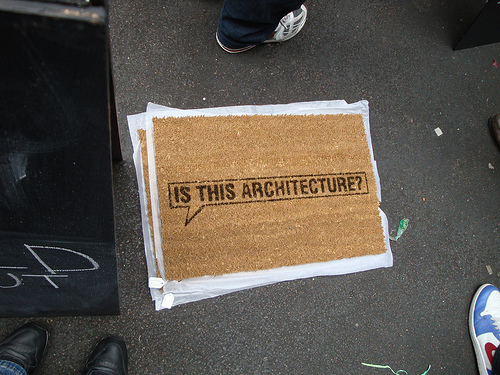

In [29]:
from IPython.display import Image
Image(filename='data/images/image-net/validation/ILSVRC2012_val_00002322.JPEG', width=300,height=300)

In [27]:
preprocessed_image = prepare_image('image-net/validation/ILSVRC2012_val_00002322.JPEG')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 186ms/step


[[('n03223299', 'doormat', 0.9988181),
  ('n02971356', 'carton', 0.00030116364),
  ('n04033901', 'quill', 5.228012e-05),
  ('n02892201', 'brass', 4.8808335e-05),
  ('n03642806', 'laptop', 3.9075312e-05)]]